In [34]:
import tweepy
import pandas as pd
import json # The API returns JSON formatted text
import numpy as np

In [2]:
# Store OAuth authentication credentials - get at https://developer.twitter.com/en/apps
ACCESS_TOKEN = '268623968-OtT57kKLulNdHEuEMwvHUSlOhEiIyLv6hmr3hQhJ'
ACCESS_SECRET = 'o9phGKVSv6xMZOxg7TT80LPmL8RD6upSA5sQVdEuYc2s2'
CONSUMER_KEY = 'jbf8ucO3H9AJ2g5UF8SenDAYU'
CONSUMER_SECRET = 'Z3fhcf4MFehlyw3tjBFmCTEbBjNmE18BfqSOfz8gMwcLxaK4Af'

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

In [3]:
TRACKING_KEYWORDS = ['bumn']
OUTPUT_FILE = "bumn.txt"
TWEETS_TO_CAPTURE = 100

In [4]:
class MyStreamListener(tweepy.StreamListener):
    """
    Twitter listener, collects streaming tweets and output to a file
    """
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open(OUTPUT_FILE, "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        
        # Stops streaming when it reaches the limit
        if self.num_tweets <= TWEETS_TO_CAPTURE:
            if self.num_tweets % 10 == 0: # just to see some progress...
                print('Numer of tweets captured so far: {}'.format(self.num_tweets))
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)
        
#%%time #let's see how long it takes

# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=TRACKING_KEYWORDS)

420
Numer of tweets captured so far: 10
Numer of tweets captured so far: 20
Numer of tweets captured so far: 30
Numer of tweets captured so far: 40
Numer of tweets captured so far: 50
Numer of tweets captured so far: 60
Numer of tweets captured so far: 70
Numer of tweets captured so far: 80
Numer of tweets captured so far: 90
Numer of tweets captured so far: 100


In [5]:
tweets_data = []

# Open connection to file
with open(OUTPUT_FILE, "r") as tweets_file:
    # Read in tweets and store in list
    for line in tweets_file:
        tweet = json.loads(line)
        tweets_data.append(tweet)
        
df = pd.DataFrame(tweets_data, columns=['created_at','lang', 'text', 'source'])
df.head()
print(df)

                        created_at lang  \
0   Thu Aug 22 02:14:02 +0000 2019   in   
1   Thu Aug 22 02:14:16 +0000 2019   in   
2   Thu Aug 22 02:14:30 +0000 2019   in   
3   Thu Aug 22 02:15:17 +0000 2019   in   
4   Thu Aug 22 02:16:31 +0000 2019  und   
5   Thu Aug 22 02:18:04 +0000 2019   in   
6   Thu Aug 22 02:19:27 +0000 2019   in   
7   Thu Aug 22 02:19:42 +0000 2019   in   
8   Thu Aug 22 02:21:39 +0000 2019   in   
9   Thu Aug 22 02:21:42 +0000 2019   in   
10  Thu Aug 22 02:22:17 +0000 2019   in   
11  Thu Aug 22 02:23:03 +0000 2019   in   
12  Thu Aug 22 02:23:07 +0000 2019   in   
13  Thu Aug 22 02:23:15 +0000 2019   in   
14  Thu Aug 22 02:23:40 +0000 2019   in   
15  Thu Aug 22 02:25:13 +0000 2019   in   
16  Thu Aug 22 02:25:24 +0000 2019   in   
17  Thu Aug 22 02:25:32 +0000 2019   tl   
18  Thu Aug 22 02:25:43 +0000 2019   in   
19  Thu Aug 22 02:26:11 +0000 2019   in   
20  Thu Aug 22 02:26:46 +0000 2019   in   
21  Thu Aug 22 02:27:32 +0000 2019   in   
22  Thu Aug

In [6]:
# Just convert to datetime
df['created_at'] = pd.to_datetime(df.created_at)
# Regular expression to get only what's between HTML tags: > <
df['source'] = df['source'].str.extract('>(.+?)<', expand=False).str.strip() 

# Check DataFrame head again
df.head()

created_at lang  \
0 2019-08-22 02:14:02+00:00   in   
1 2019-08-22 02:14:16+00:00   in   
2 2019-08-22 02:14:30+00:00   in   
3 2019-08-22 02:15:17+00:00   in   
4 2019-08-22 02:16:31+00:00  und   

                                                text               source  
0  RT @SherlyAnnavita: Selamatkan BUMN Kita Sekar...  Twitter for Android  
1  RT @LiamCamachoe: Bukannya @fadjroeL mjd Komis...  Twitter for Android  
2  Ngemeng G20 lah, Summit lah. \nNggak mikirin k...  Twitter for Android  
3  RT @bandabening: Kas Adhi Karya "berdarah-dara...  Twitter for Android  
4  @fadjroeL @ParagitaChoir @agnezmo @univ_indone...  Twitter for Android

In [7]:
df.lang.value_counts()

in     98
und     1
tl      1
Name: lang, dtype: int64

In [8]:
df.source.value_counts()

Twitter for Android    62
Twitter Web App        25
Twitter for iPhone      7
IFTTT                   2
Instagram               1
dlvr.it                 1
Zapier.com              1
Facebook                1
Name: source, dtype: int64

In [9]:
# create filter for most popular languages
lang_mask = (df.lang == 'in') | (df.lang == 'fr') | (df.lang == 'und')

# create a filter for most popular sources
source_mask = (df.source == 'Twitter for Android') | (df.source == 'Twitter Web App')\
    | (df.source == 'Twitter for iPhone') | (df.source == 'Twitter Web Client') \
    | (df.source == 'dlvr.it') | (df.source == 'Tween') | (df.source == 'Mobile Web (M2)') | (df.source == 'TweetDeck')\
    | (df.source == 'Hootsuite Inc.') | (df.source == 'Bad Kitty') | (df.source == 'Twitter for iPad')

(df[lang_mask & source_mask].groupby(['source','lang']) # apply filter/groupby
 .size() # get count of tweets per source/lang
 .unstack() # unstack to create new DF 
 .fillna(0) # fill NaN with 0
 .plot(kind='bar', figsize=(14,7), title='Tweets by source and language') # plot
)

In [10]:
import re

# remove special characters and convert to lowercase
df['text'] = df['text'].apply(lambda x: re.sub('[!@#$:).;,?&-]', '', x.lower()))
df['text'] = df['text'].apply(lambda x: re.sub('  ', ' ', x))

text = ' '.join(txt for txt in df.text)
print ('There are {} words in the combination of text rows.'.format(len(text)))

There are 12578 words in the combination of text rows.


In [11]:
text

'rt sherlyannavita selamatkan bumn kita sekarang juga reposted from instagram account sherlyannavita https//tco/azrg4yguvs rt liamcamachoe bukannya fadjroel mjd komisaris utama di perusahaan bumn ini ya\n\nmasa nggak bisa membantu perusahaan spy terhindar dari… ngemeng g20 lah summit lah \nnggak mikirin kalo bpjs msh utang trilyunan bumn pada bangkrut jelata pada di phk… https//tco/ws4ksvstne rt bandabening kas adhi karya "berdarahdarah"\nini bumn tempat seorang buzzer fadjrul rachman di tempatkan sebagai komisaris utama\nht… fadjroel paragitachoir agnezmo univ_indonesia pedoman_id bangbro4iluni ui_library itbofficial https//tco/49ewobyguv rt liamcamachoe bukannya fadjroel mjd komisaris utama di perusahaan bumn ini ya\n\nmasa nggak bisa membantu perusahaan spy terhindar dari… tofagarislurus tempodotco petinggi tempo kemarin udah diangkat jadi komisaris bumn\n\nmungkin petinggi tempo skran… https//tco/h4bd105keo rt sherlyannavita selamatkan bumn kita sekarang juga reposted from instagra

In [12]:
df['words'] = df.text.str.strip().str.split('[\W_]+')
df.head()

created_at lang  \
0 2019-08-22 02:14:02+00:00   in   
1 2019-08-22 02:14:16+00:00   in   
2 2019-08-22 02:14:30+00:00   in   
3 2019-08-22 02:15:17+00:00   in   
4 2019-08-22 02:16:31+00:00  und   

                                                text               source  \
0  rt sherlyannavita selamatkan bumn kita sekaran...  Twitter for Android   
1  rt liamcamachoe bukannya fadjroel mjd komisari...  Twitter for Android   
2  ngemeng g20 lah summit lah \nnggak mikirin kal...  Twitter for Android   
3  rt bandabening kas adhi karya "berdarahdarah"\...  Twitter for Android   
4  fadjroel paragitachoir agnezmo univ_indonesia ...  Twitter for Android   

                                               words  
0  [rt, sherlyannavita, selamatkan, bumn, kita, s...  
1  [rt, liamcamachoe, bukannya, fadjroel, mjd, ko...  
2  [ngemeng, g20, lah, summit, lah, nggak, mikiri...  
3  [rt, bandabening, kas, adhi, karya, berdarahda...  
4  [fadjroel, paragitachoir, agnezmo, univ, indon...

In [13]:
rows = list()
for row in df[['source', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.source, word))

words = pd.DataFrame(rows, columns=['source', 'word'])
words.head()

source            word
0  Twitter for Android              rt
1  Twitter for Android  sherlyannavita
2  Twitter for Android      selamatkan
3  Twitter for Android            bumn
4  Twitter for Android            kita

In [14]:
words = words[words.word.str.len() > 0]
words.head()

source            word
0  Twitter for Android              rt
1  Twitter for Android  sherlyannavita
2  Twitter for Android      selamatkan
3  Twitter for Android            bumn
4  Twitter for Android            kita

In [15]:
words['word'] = words.word.str.lower()
words.head()

source            word
0  Twitter for Android              rt
1  Twitter for Android  sherlyannavita
2  Twitter for Android      selamatkan
3  Twitter for Android            bumn
4  Twitter for Android            kita

In [16]:
counts = words.groupby('source')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'}) #n_w = istilah kata "word" yang muncul perdevice
counts.head()

n_w
source   word       
Facebook 1         1
         7         1
         alasan    1
         anda      1
         deve      1

In [17]:
counts

n_w
source     word              
Facebook   1                1
           7                1
           alasan           1
           anda             1
           deve             1
           di               1
           dilaksanakan     1
           https            1
           inilah           1
           kenapa           1
           membeli          1
           oleh             1
           parayasa         1
           parungpanjang    1
           pembangun        1
           perumnas         1
           rumah            1
           tco              1
           uizwgzi0li       1
IFTTT      2019             2
           asal             2
           bumn             2
           digagas          2
           https            2
           kementrian       2
           mengenal         2
           nusantara        2
           oleh             2
           para             2
           peserta          2
...                       ...
Zapier.com fresh            1
           graduate         1
           https            1
           info             1
           j6ookacbvi       1
           lowongan         1
           pln              1
           smk              1
           syarat           1
           tco              1
           untuk            1
dlvr.it    asal             1
           badan            1
           bumn             1
           dekat            1
           https            1
           kantor           1
           kementerian      1
           kenali           1
           kunjungi         1
           kwg87zrl61       1
           lebih            1
           maluku           1
           mengenal         1
           milik            1
           negara           1
           nusantara        1
           siswa            1
           tco              1
           usaha            1

[747 rows x 1 columns]

n_w
source              word              
Facebook            1                1
                    7                1
                    alasan           1
                    anda             1
                    deve             1
IFTTT               2019             2
                    asal             2
                    bumn             2
                    digagas          2
                    https            2
Instagram           18y4ks6uee       1
                    agus             1
                    agustus          1
                    ajbimb           1
                    bagi             1
Twitter Web App     rt              18
                    bumn            11
                    ada              9
                    https            9
                    negara           9
Twitter for Android rt              45
                    bumn            39
                    sby             36
                    https           28
                    tco             28
Twitter for iPhone  sby              6
                    yg               6
                    bumn             5
                    rt               5
                    di               4
Zapier.com          pt               2
                    berpengalaman    1
                    bersama          1
                    bumn             1
                    cogindo          1
dlvr.it             asal             1
                    badan            1
                    bumn             1
                    dekat            1
                    https            1

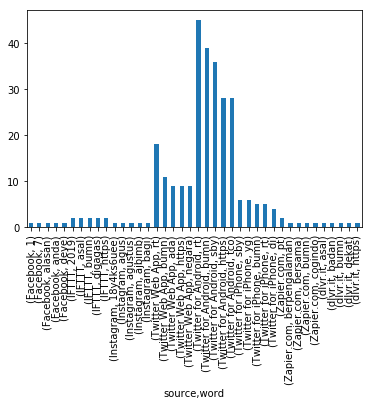

In [18]:
def pretty_plot_top_n(series, top_n=5, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])

In [19]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'}) #n_d = total dari n_w dari setiap device
word_sum

n_d
source                   
Facebook               19
IFTTT                  40
Instagram              22
Twitter Web App       466
Twitter for Android  1103
Twitter for iPhone    133
Zapier.com             20
dlvr.it                19

In [20]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d #tf = rata - rata dari n_w yang muncul setiap n_d

tf.head()

n_w  n_d        tf
source   word                      
Facebook 1         1   19  0.052632
         7         1   19  0.052632
         alasan    1   19  0.052632
         anda      1   19  0.052632
         deve      1   19  0.052632

tf
source              word                   
Facebook            1              0.052632
                    7              0.052632
                    alasan         0.052632
                    anda           0.052632
                    deve           0.052632
IFTTT               2019           0.050000
                    asal           0.050000
                    bumn           0.050000
                    digagas        0.050000
                    https          0.050000
Instagram           18y4ks6uee     0.045455
                    agus           0.045455
                    agustus        0.045455
                    ajbimb         0.045455
                    bagi           0.045455
Twitter Web App     rt             0.038627
                    bumn           0.023605
                    ada            0.019313
                    https          0.019313
                    negara         0.019313
Twitter for Android rt             0.040798
                    bumn           0.035358
                    sby            0.032638
                    https          0.025385
                    tco            0.025385
Twitter for iPhone  sby            0.045113
                    yg             0.045113
                    bumn           0.037594
                    rt             0.037594
                    di             0.030075
Zapier.com          pt             0.100000
                    berpengalaman  0.050000
                    bersama        0.050000
                    bumn           0.050000
                    cogindo        0.050000
dlvr.it             asal           0.052632
                    badan          0.052632
                    bumn           0.052632
                    dekat          0.052632
                    https          0.052632

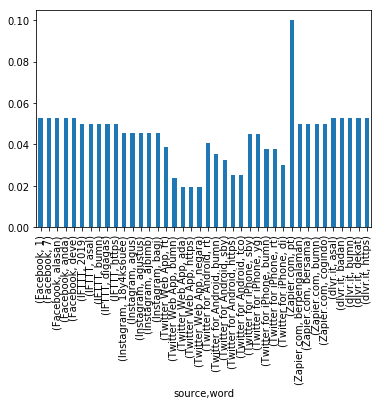

In [21]:
pretty_plot_top_n(tf['tf'])

In [22]:
c_d = words.source.nunique()
c_d

8

In [23]:
idf = words.groupby('word')\
    .source\
    .nunique()\
    .to_frame()\
    .rename(columns={'source':'i_d'})\
    .sort_values('i_d')
idf.head()

i_d
word        
01         1
ngisi      1
ngincar    1
ngemeng    1
ngebut     1

In [24]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()

i_d       idf
word                  
01         1  2.079442
ngisi      1  2.079442
ngincar    1  2.079442
ngemeng    1  2.079442
ngebut     1  2.079442

In [25]:
tf_idf = tf.join(idf)

tf_idf.head()

n_w  n_d        tf  i_d       idf
source   word                                     
Facebook 1         1   19  0.052632    1  2.079442
         7         1   19  0.052632    1  2.079442
         alasan    1   19  0.052632    1  2.079442
         anda      1   19  0.052632    2  1.386294
         deve      1   19  0.052632    1  2.079442

In [26]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head()

n_w  n_d        tf  i_d       idf    tf_idf
source   word                                               
Facebook 1         1   19  0.052632    1  2.079442  0.109444
         7         1   19  0.052632    1  2.079442  0.109444
         alasan    1   19  0.052632    1  2.079442  0.109444
         anda      1   19  0.052632    2  1.386294  0.072963
         deve      1   19  0.052632    1  2.079442  0.109444

tf_idf
source              word                    
Facebook            1               0.109444
                    7               0.109444
                    alasan          0.109444
                    deve            0.109444
                    inilah          0.109444
IFTTT               2019            0.103972
                    digagas         0.103972
                    kementrian      0.103972
                    para            0.103972
                    peserta         0.103972
Instagram           18y4ks6uee      0.094520
                    agus            0.094520
                    agustus         0.094520
                    ajbimb          0.094520
                    bebas           0.094520
Twitter Web App     rt              0.037886
                    direktur        0.035699
                    emerson         0.035699
                    integritas      0.035699
                    kasus           0.035699
Twitter for Android rt              0.040016
                    sby             0.032013
                    yg              0.023120
                    utang           0.022231
                    sherlyannavita  0.018853
Twitter for iPhone  sby             0.044248
                    yg              0.044248
                    rt              0.036873
                    mencoba2        0.031270
                    utang           0.029499
Zapier.com          pt              0.138629
                    dewa            0.103972
                    info            0.103972
                    j6ookacbvi      0.103972
                    berpengalaman   0.069315
dlvr.it             dekat           0.109444
                    kantor          0.109444
                    kementerian     0.109444
                    kenali          0.109444
                    kunjungi        0.109444

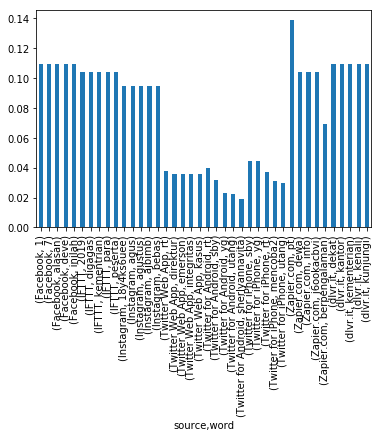

In [27]:
pretty_plot_top_n(tf_idf['tf_idf'])

n
word              
sby             45
saya            15
sayangnya       15
soal            15
soeyoto1        15
sebagai         13
seorang         11
sherlyannavita  10
spy              9
sekarang         5

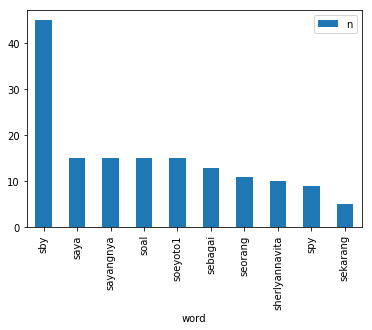

In [28]:
r = words[words.word.str.match('^s')]\
    .groupby('word')\
    .count()\
    .rename(columns={'source': 'n'})\
    .nlargest(10, 'n')
r.plot.bar()
r

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

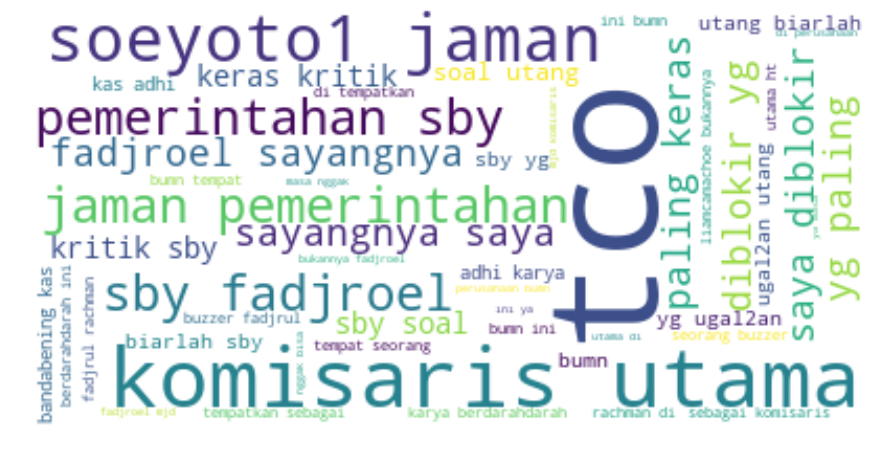

In [30]:
stopwords = set(STOPWORDS) # pre-defined words to ignore
# adding extra words to ignore: 
# many tweets contain RT in the text, and we know the tweets are about Donald Trump
stopwords.update(['rt', 'dan', 'https', 'msaid_didu']) 

wordcloud = (WordCloud(background_color="white", # easier to read
                      max_words=50, # let's no polute it too much
                      stopwords=stopwords) # define words to ignore
                      .generate(text)) # generate the wordcloud with text

plt.figure(figsize=(15,10)) # make the plot bigger
# Show the plot (interpolation='bilinear' makes it better looking)
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")

In [31]:
words.word

0                   rt
1       sherlyannavita
2           selamatkan
3                 bumn
4                 kita
5             sekarang
6                 juga
7             reposted
8                 from
9            instagram
10             account
11      sherlyannavita
12               https
13                 tco
14          azrg4yguvs
15                  rt
16        liamcamachoe
17            bukannya
18            fadjroel
19                 mjd
20           komisaris
21               utama
22                  di
23          perusahaan
24                bumn
25                 ini
26                  ya
27                masa
28               nggak
29                bisa
             ...      
1843               apa
1844             https
1845               tco
1846        hbgjugp8cv
1847               jul
1848         panjulada
1849                yg
1850           nyariin
1851               tuh
1852                rt
1853          soeyoto1
1854             jaman
1855      p

In [32]:
r.median()

n    14.0
dtype: float64

In [33]:
r.mean()

n    15.3
dtype: float64